Assignment 1: Regression Using Least Squares
Deadline: September 2, 2019 at 5pm

Karolina Bargiel

Note: For the exercise 8 and 9 , I have mirrored my reasoning which is shown in exercises 3-7, just for the cases with diffrent noise level and different curve function.
Colours of the diagrams are the same throughtout the whole project and express the original curve based on equation (red),  Estimated fitting line (blue) and the noisy data (yellow dots).



Exercise 1 & 2
Generate 50 2D-data points using the following function:	 
Add Gaussian random noise to the data. Look at the sample code here: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

def actual_distribution():
    x = np.arange(0, 10, 0.2);
    np.random.seed(0) 
    y = 0.4345*np.power(x,3) - 5.607 * np.power(x, 2) + 16.78*x - 10.61
    return x, y
def add_noise(y_curve):
    mu =0
    sigma = 4.0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    np.random.seed(0) 
    
    return y_noise



Exercise 3 
Fit the generated noisy data using the least squares method based on a polynomial function. 

In [2]:
import numpy as matrix 
x, y = actual_distribution()
M = 4
N = len(x)

X = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        X[j, i] = x[j]**i
        
#creating the empty marix X and enering the generated values to it in the dimention N*M
        
T = X.transpose()
J = np.linalg.inv(np.matmul(T, X))
t = add_noise(y)
w_bar_1 = np.matmul(np.matmul(J, T), t)
y_new = np.matmul(X, w_bar_1)



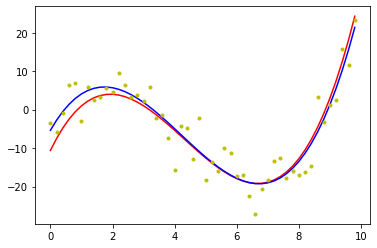

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, y, "r")
plt.plot(x, y_new, "b")
plt.plot(x, t, "y.")

plt.show()


Diagram showing the original curve based on equation (red). Estimated fitting line, by setting M=4 (blue) and the noisy data (yellow dots).

Below I present the same reasoning just using np.linalg.pinv

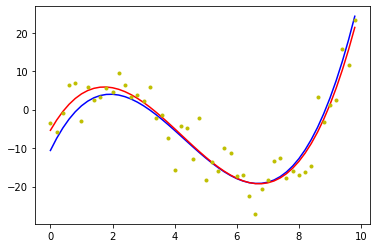

In [4]:
X_psuedoin = np.linalg.pinv(X)
w_bar_2 = np.matmul(X_psuedoin, t)
y_new_2 = np.matmul(X, w_bar_2)

plt.plot(x, y, "b")
plt.plot(x, y_new_2, "r")
plt.plot(x, t, "y.")

plt.show()

Diagram indetical to the one above, just using w_bar_2.

Exercise 5
Compute and display the error value, E(w)

In [5]:
E = 0.5 * np.matmul((y_new-t).transpose(),(y_new-t))
print(E)

428.4469469535708


Exercise 6
Display the estimated values of w

In [6]:
print(w_bar_1)

print(w_bar_2)

#we can see taht w_bar_1 =  w_bar_2 , they both express the same matrix just calculated in a 

[-5.3723839  14.21481051 -5.15300368  0.40622765]
[-5.3723839  14.21481051 -5.15300368  0.40622765]


Exercise 7
Experiment with your code by changing M to various values. Plot the values of M against those of E(w), meaning: project them onto a 2D space, where the x-axis is M and the y-axis is E(w). Try to understand the cases of underfitting and overfitting, and how they relate to the error value, E(w) 

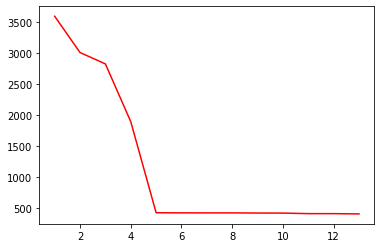

In [7]:
M_experiment_array = [1,2,3,4,5,6,7,8,9,10,11,12,13]
M_experiment = 13


N = len(x)

E_experiment = []


for m in range(M_experiment):
    
     
    X_e = matrix.empty([N, m]) 
    
    x, y = actual_distribution()

    for i in range(m):
        for j in range(N):
            X_e[j, i] = x[j]**i

    
    T_e = X_e.transpose()
    J_e = np.linalg.inv(np.matmul(T_e, X_e))
    t_e = add_noise(y)
    w_e = np.matmul(np.matmul(J_e, T_e), t_e)
    y_new_e = np.matmul(X_e, w_e)
    
    E_experiment.append(0.5 * np.matmul((y_new_e - t_e).transpose(),(y_new_e - t_e)))
   
   

plt.plot(M_experiment_array, E_experiment, "r")


plt.show()


Diagram shwos the value of M against E(w)


Overfitting problem with the M value set to 12:

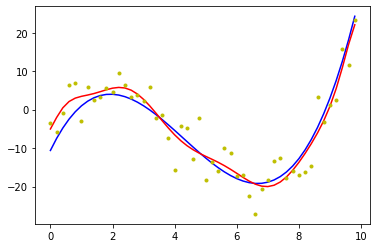

In [8]:
x, y = actual_distribution()
M = 12
N = len(x)

X = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        X[j, i] = x[j]**i
        

        
T = X.transpose()
J = np.linalg.inv(np.matmul(T, X))
t = add_noise(y)
w_bar_1 = np.matmul(np.matmul(J, T), t)
y_new = np.matmul(X, w_bar_1)




plt.plot(x, y, "b")
plt.plot(x, y_new, "r")
plt.plot(x, t, "y.")

plt.show()

Diagram shows overfitting problem.

Exercise 8 Change the noise levels, and apply the the same operations above

In [9]:
def add_noise_changed(y_curve):
    mu =6
    sigma = 10.0
    noise_changed = np.random.normal(mu, sigma, len(y_curve))
    y_noise_changed = y_curve + noise_changed
    
    return y_noise_changed


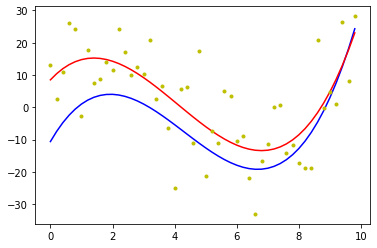

In [10]:
x_NoiseChanged, y_NoiseChanged = actual_distribution()
M_NoiseChanged = 4
N_NoiseChanged = len(x)

X_NoiseChanged = matrix.empty([N_NoiseChanged, M_NoiseChanged]) 
for i in range(M_NoiseChanged):
    for j in range(N_NoiseChanged):
        X_NoiseChanged[j, i] = x_NoiseChanged[j]**i
        

        
T_NoiseChanged = X_NoiseChanged.transpose()
J_NoiseChanged = np.linalg.inv(np.matmul(T_NoiseChanged, X_NoiseChanged))
t_NoiseChanged = add_noise_changed(y)
w_bar_1_NoiseChanged = np.matmul(np.matmul(J_NoiseChanged, T_NoiseChanged), t_NoiseChanged)
y_new_NoiseChanged = np.matmul(X_NoiseChanged, w_bar_1_NoiseChanged)

plt.plot(x_NoiseChanged, y_NoiseChanged, "b")
plt.plot(x_NoiseChanged, y_new_NoiseChanged, "r")
plt.plot(x_NoiseChanged, t_NoiseChanged, "y.")

plt.show()

Diagram showing the original curve based on equation (red). Estimated fitting line, by setting M=4 (blue) and the noisy data (yellow dots) with new noice level.

Below they I compute and display the error value, E(w) for the opearations on new noice level and estimated values of w.

In [219]:
E_NoiseChanged = 0.5 * np.matmul((y_new_NoiseChanged-t_NoiseChanged).transpose(),(y_new_NoiseChanged-t_NoiseChanged))
print(E_NoiseChanged)

print(w_bar_1_NoiseChanged)

2677.793418459817
[ 8.48404024 10.36702627 -4.47200921  0.36381912]


Below I plot the values of M against those of E(w), as above just this time for the new noice levels.

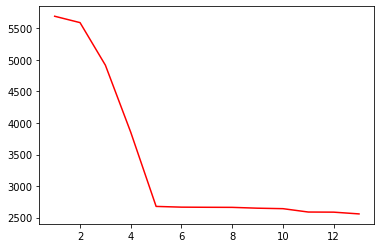

In [220]:
M_NoiseChanged_array = [1,2,3,4,5,6,7,8,9,10,11,12,13]
M_NoiseChanged= 13


N_NoiseChanged = len(x_NoiseChanged)

E_experiment_NoiseChanged = []


for m in range(M_NoiseChanged):
    
     
    X_e_NoiseChanged = matrix.empty([N_NoiseChanged, m]) 
    
    x_NoiseChanged, y_NoiseChanged = actual_distribution()

    for i in range(m):
        for j in range(N):
            X_e_NoiseChanged[j, i] = x_NoiseChanged[j]**i

    
    T_e_NoiseChanged = X_e_NoiseChanged.transpose()
    J_e_NoiseChanged = np.linalg.inv(np.matmul(T_e_NoiseChanged, X_e_NoiseChanged))
    t_e_NoiseChanged = add_noise_changed(y_NoiseChanged)
    w_e_NoiseChanged = np.matmul(np.matmul(J_e_NoiseChanged, T_e_NoiseChanged), t_e_NoiseChanged)
    y_new_e_NoiseChanged = np.matmul(X_e_NoiseChanged, w_e_NoiseChanged)
    
    E_experiment_NoiseChanged.append(0.5 * np.matmul((y_new_e_NoiseChanged - t_e_NoiseChanged).transpose(),(y_new_e_NoiseChanged - t_e_NoiseChanged)))
   
   

plt.plot(M_NoiseChanged_array, E_experiment_NoiseChanged, "r")


plt.show()


Diagram shwos the value of M against E(w) for new noice level.

Overfitting problem calcualtions: 

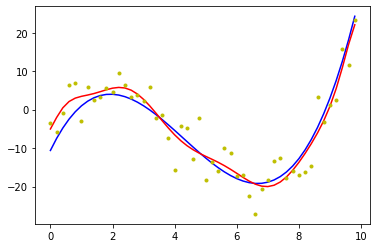

In [221]:

M_NoiseChanged = 12
N_NoiseChanged = len(x)

X_NoiseChanged = matrix.empty([N_NoiseChanged, M_NoiseChanged]) 
for i in range(M_NoiseChanged):
    for j in range(N_NoiseChanged):
        X_NoiseChanged[j, i] = x[j]**i
        

        
T_NoiseChanged = X_NoiseChanged.transpose()
J_NoiseChanged = np.linalg.inv(np.matmul(T_NoiseChanged, X_NoiseChanged))
t_NoiseChanged = add_noise_changed(y_NoiseChanged)
w_bar_1_NoiseChanged = np.matmul(np.matmul(J_NoiseChanged, T_NoiseChanged), t_NoiseChanged)
y_new_NoiseChanged = np.matmul(X_NoiseChanged, w_bar_1_NoiseChanged)


plt.plot(x, y, "b")
plt.plot(x, y_new, "r")
plt.plot(x, t, "y.")

plt.show()

#above is expressed in the below diagram:



Exercise 9
Change the function for generating the data to: y=sin (x^2 +1) , and apply the same operations as above 

In [280]:
def actual_distribution_changed(): 
    x_Sin = np.arange(0, 1, 0.02);
    y_Sin = np.sin(x**2 +1)
    return x_Sin, y_Sin

#I have decided to genreate new random data which will be placed from 0 to 1 in order to express sin fuction correctly 

In [281]:
def add_noise_changed_forSin(y_curve):
    mu =0
    sigma = 0.04
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    
    return y_noise
#I decresed noise level for sin fuction

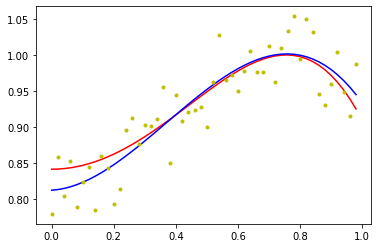

In [287]:
x_Sin, y_Sin = actual_distribution_changed()
M_Sin = 4
N_Sin = len(x_Sin)

X_Sin = matrix.empty([N_Sin, M_Sin]) 
for i in range(M_Sin):
    for j in range(N_Sin):
        X_Sin[j, i] = x_Sin[j]**i
        

        
T_Sin = X_Sin.transpose()
J_Sin= np.linalg.inv(np.matmul(T_Sin, X_Sin))
t_Sin = add_noise_changed_forSin(y_Sin)
w_bar_1_Sin = np.matmul(np.matmul(J_Sin, T_Sin), t_Sin)
y_new_Sin= np.matmul(X_Sin, w_bar_1_Sin)


plt.plot(x_Sin, y_Sin, "r")
plt.plot(x_Sin, y_new_Sin, "b")
plt.plot(x_Sin, t_Sin, "y.")


plt.show()

In [288]:
E_Sin = 0.5 * np.matmul((y_new_Sin-t_Sin).transpose(),(y_new_Sin-t_Sin))
print(E_Sin)


print(w_bar_1_Sin)

#we can observe that the error is really small as we decrised the noise level

0.026868994426137834
[ 0.81236037  0.02557888  0.9211503  -0.82566858]



Below I plot the values of M against those of E(w), as above just this time for the function y =x^2 +1 , with new noise level.

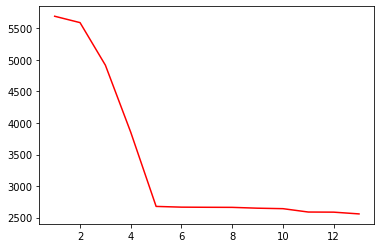

In [289]:
M_SinFunction_array = [1,2,3,4,5,6,7,8,9,10,11,12,13]
M_SinFunction= 13


N_SinFunction = len(x_SinFunction)

E_experiment_SinFunction = []


for m in range(M_SinFunction):
    
     
    X_e_SinFunction = matrix.empty([N_SinFunction, m]) 
    
    x_SinFunction, y_SinFunction = actual_distribution()

    for i in range(m):
        for j in range(N):
            X_e_SinFunction[j, i] = x_SinFunction[j]**i

    
    T_e_SinFunction = X_e_SinFunction.transpose()
    J_e_SinFunction = np.linalg.inv(np.matmul(T_e_SinFunction, X_e_SinFunction))
    t_e_SinFunction = add_noise_changed(y_SinFunction)
    w_e_SinFunction = np.matmul(np.matmul(J_e_SinFunction, T_e_SinFunction), t_e_SinFunction)
    y_new_e_SinFunction= np.matmul(X_e_SinFunction, w_e_SinFunction)
    
    E_experiment_SinFunction.append(0.5 * np.matmul((y_new_e_SinFunction - t_e_SinFunction).transpose(),(y_new_e_SinFunction - t_e_SinFunction)))
   
   

plt.plot(M_SinFunction_array, E_experiment_SinFunction, "r")


plt.show()


Below I show overfitting problem expressed on new changed funstion y = x^2 +1 : 

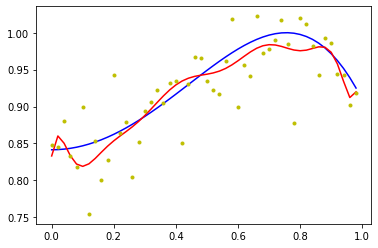

In [286]:
x_SinFunction, y_SinFunction = actual_distribution_changed()
M_SinFunction = 12
N_SinFunction = len(x_SinFunction)

X_SinFunction = matrix.empty([N_SinFunction, M_SinFunction]) 
for i in range(M_SinFunction):
    for j in range(N_SinFunction):
        X_SinFunction[j, i] = x_SinFunction[j]**i
        

        
T_SinFunction = X_SinFunction.transpose()
J_SinFunction = np.linalg.inv(np.matmul(T_SinFunction, X_SinFunction))
t_SinFunction = add_noise_changed_forSin(y_SinFunction)
w_SinFunction = np.matmul(np.matmul(J_SinFunction, T_SinFunction), t_SinFunction)
y_new_SinFunction = np.matmul(X_SinFunction, w_SinFunction)


plt.plot(x_SinFunction, y_SinFunction, "b")
plt.plot(x, y_new_SinFunction, "r")
plt.plot(x_SinFunction, t_SinFunction, "y.")

plt.show()